<h1 style = 'color:purple'> Regression  </h1>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [2]:
#reading dataset
df_sales = pd.read_csv(r'.\data\Advertising.csv',index_col=0)

**Linear Regression In Simple Terms :**

- Imagine you have a bunch of data points on a graph. Linear regression is like drawing a straight line through those points that best represents the relationship between them.

- The line is determined by two things: its slope (how steep it is) and its intercept (where it crosses the vertical axis).

- Linear regression tries to find the best values for the slope and intercept that minimize the distance between the line and all the data points. In other words, it tries to find the line that comes closest to passing through as many points as possible.

- Once we have this line, we can use it to make predictions. For example, if we know the x-coordinate (input) of a point, linear regression can predict the y-coordinate (output) based on the line's equation.

- So, linear regression is a way to find a straight line that represents the relationship between variables in the data and use it to make predictions or understand the connection between them.

Let's consider a simple example to illustrate linear regression.

*Suppose you want to predict the price of a house based on its size. You collect data on different houses, where each data point consists of the size of a house (in square feet) and its corresponding price (in dollars).*

- Here's a small set of example data points:

                            Size(in square feet)   Price (in dollars)
                                    1000            	150,000
                                    1500	            200,000
                                    1200	            180,000
                                    1800	            250,000
                                    2000	            300,000

- To apply linear regression, we plot these data points on a graph, where the x-axis represents the house size, and the y-axis represents the house price. Each point corresponds to a specific house.

     *The goal is to find a straight line that best fits these data points. This line will be our regression line.*

             After applying linear regression, we might obtain a line that looks something like this:


                                       |       *
                                       |     *
                                       |   *
                                Price  | *
                                       |_____________________
                                           Size of the House
- The regression line represents the relationship between the house size and price. It allows us to make predictions about the price of a house based on its size.

- For example, if we want to predict the price of a house with a size of 1,300 square feet, we can locate this value on the x-axis and follow it up to the regression line. From there, we can read the corresponding predicted price on the y-axis.

- Linear regression finds the slope and intercept of the regression line that minimizes the difference between the line and the actual data points. By using this line, we can estimate the price of houses for which we don't have explicit data.

- Keep in mind that this is a simplified example, and in practice, linear regression can handle multiple input variables and more complex relationships.


<h2 style = 'color:Darkblue'> Simple Linear Regression Model </h2>

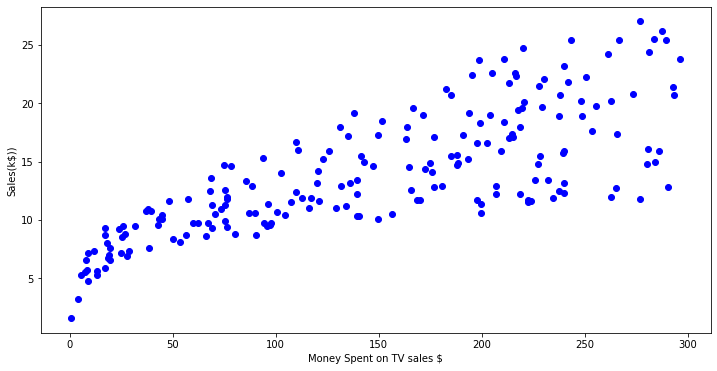

In [3]:
plt.figure(figsize=(12,6))
plt.scatter(df_sales['TV'],df_sales['sales'],c='blue')
plt.xlabel('Money Spent on TV sales $')
plt.ylabel('Sales(k$))')
plt.show()

In [4]:
X = df_sales['TV'].values.reshape(-1,1)
y = df_sales['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

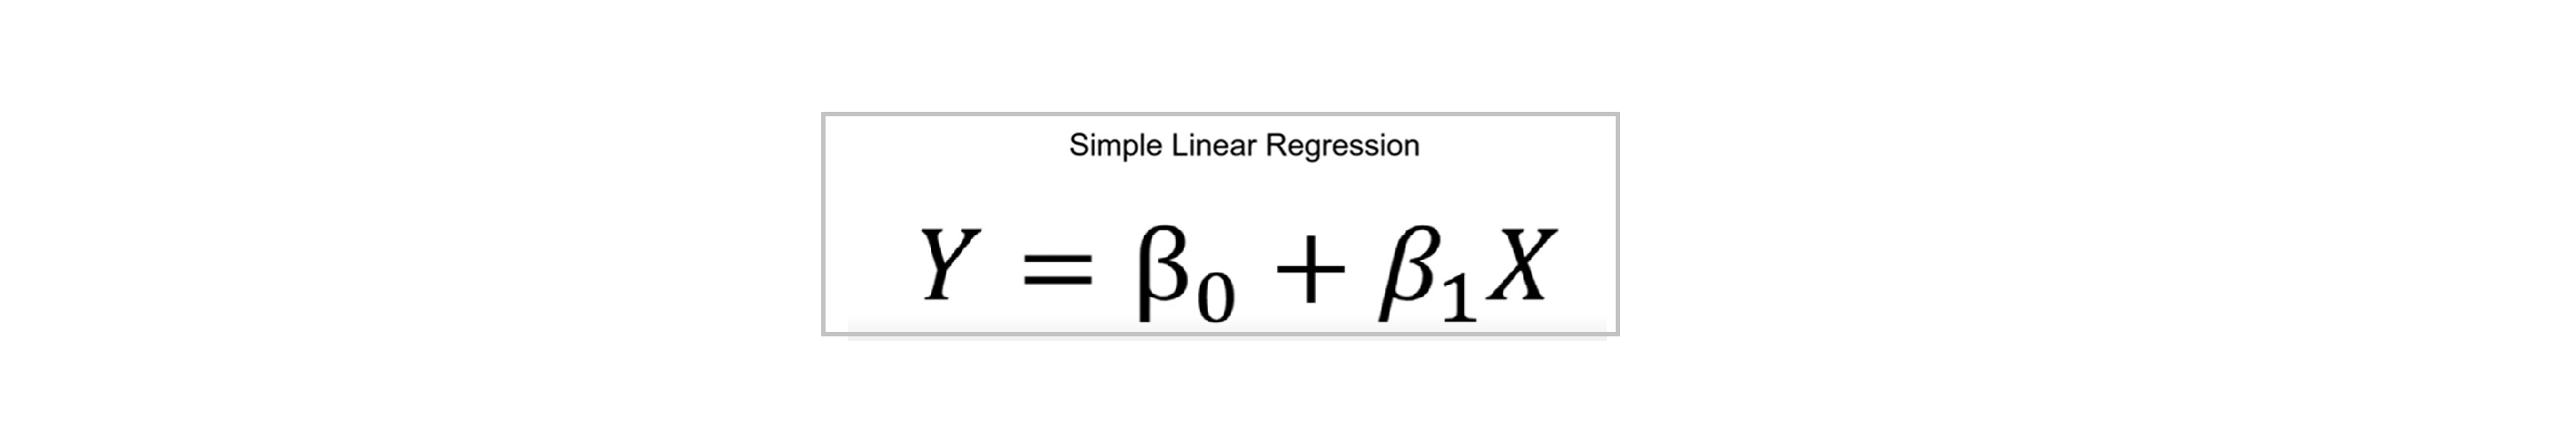

In [5]:
print(f"The linear Regression model is : \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]} * TV")

The linear Regression model is : 
 Y = 7.032593549127695 + 0.04753664043301975 * TV


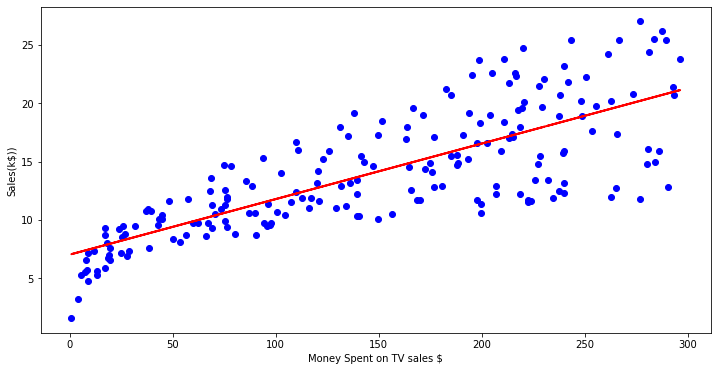

In [6]:
predictions = reg.predict(X)
plt.figure(figsize = (12,6))
plt.scatter(X,y,c='blue')
plt.plot(X,predictions,c = 'red',linewidth=2)
plt.xlabel('Money Spent on TV sales $')
plt.ylabel('Sales(k$))')
plt.show()

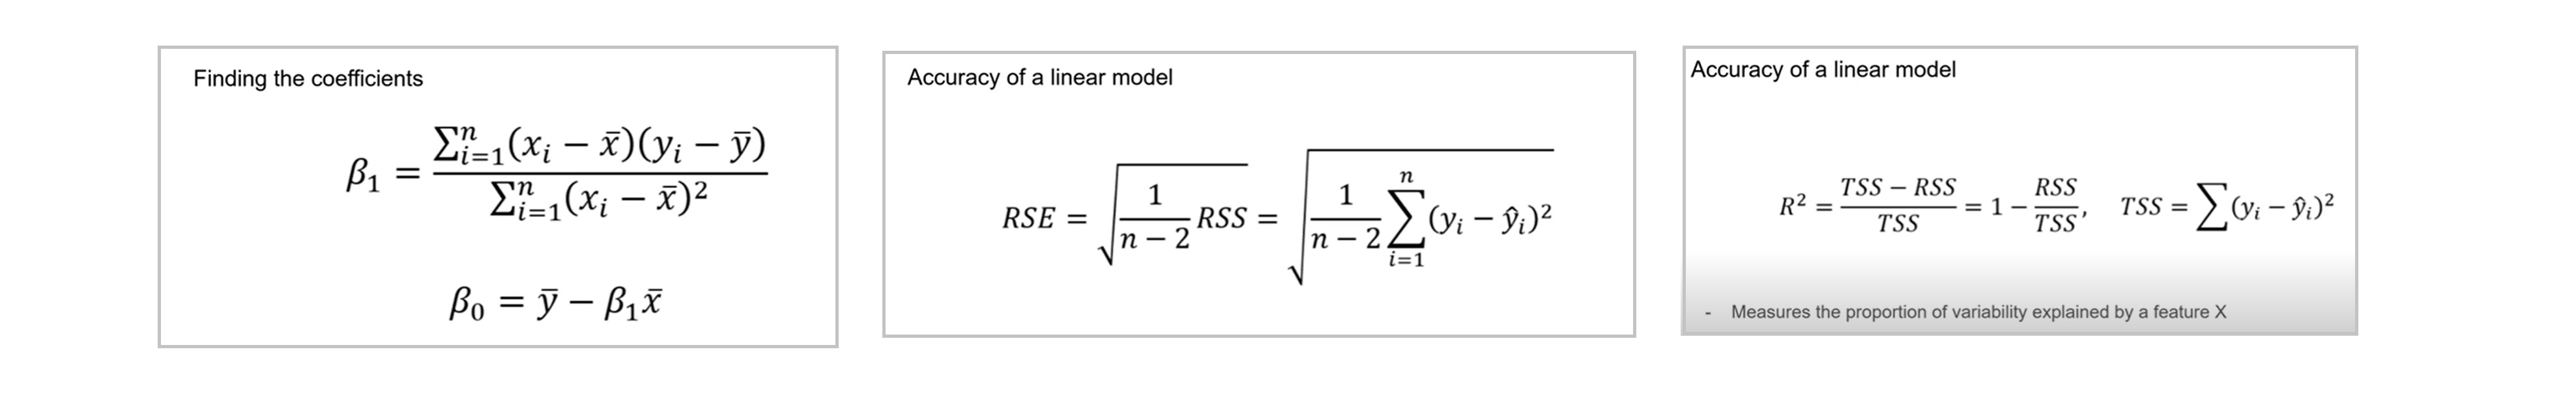

In [7]:
X = df_sales['TV']
y = df_sales['sales']

exog = sm.add_constant(X)
est = sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        21:39:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

**The difference between linear regression and multiple regression lies in the number of independent variables (or features) used to predict the dependent variable.**

**Linear Regression:**
- Linear regression is a basic form of regression analysis that models the relationship between a dependent variable and a single independent variable. It aims to find a linear equation that best fits the data points. The equation has the form:

                                        y = mx + b
                                        
                y is the dependent variable or the variable to be predicted.
                x is the independent variable or the input feature.
                m is the slope of the line (regression coefficient), representing the relationship between x and y.
                b is the y-intercept, representing the point where the line intersects the y-axis.

- Linear regression assumes a linear relationship between the independent and dependent variables. It is suitable when there is only one predictor variable and the relationship can be adequately represented by a straight line.


**Multiple Regression:**

- Multiple regression extends the concept of linear regression to include more than one independent variable. Instead of a single predictor, multiple regression models the relationship between a dependent variable and multiple independent variables.

        The equation for multiple regression takes the form:

                        y = b0 + b1x1 + b2x2 + ... + bnxn

                    y is the dependent variable.
                    x1, x2, ..., xn are the independent variables.
                    b0 is the y-intercept.
                    b1, b2, ..., bn are the regression coefficients corresponding to each independent variable.
                    
- In multiple regression, each independent variable contributes to the prediction of the dependent variable, allowing for more complex relationships. It can capture the influence of multiple factors on the outcome, accounting for the potential interactions between variables.

- Multiple regression is commonly used when there are multiple predictors involved and the relationship between the dependent variable and predictors is not adequately described by a single line. It enables a more comprehensive analysis of the impact of various factors on the outcome.








<h3 style='color:#FF0090'> Multiple Linear Regression Model

In [8]:
Xs = df_sales.drop(['sales'],axis=1)
y = df_sales['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs,y)

LinearRegression()

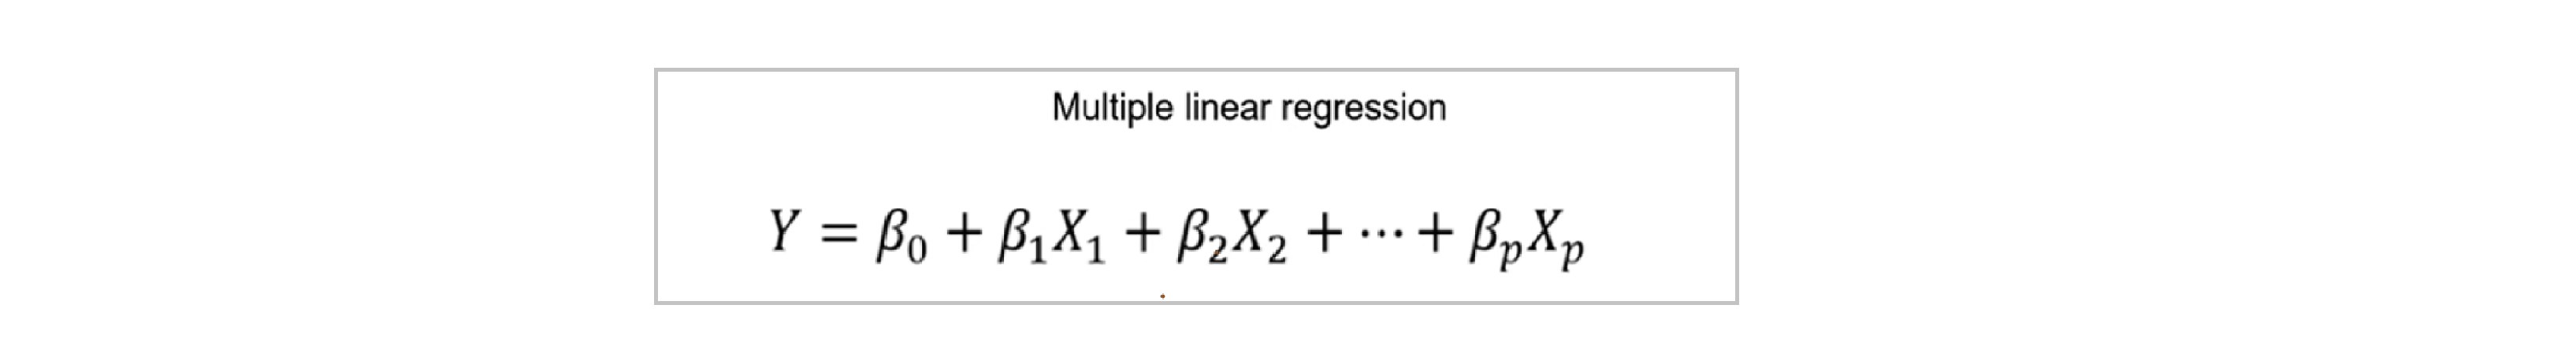

In [9]:
print(f"This linear Model:\n\n   Y = {reg.intercept_[0]} + ({reg.coef_[0][0]}) * TV  + ({reg.coef_[0][1]}) * radio +({reg.coef_[0][2]}) * newspaper")

This linear Model:

   Y = 2.938889369459412 + (0.0457646454553976) * TV  + (0.18853001691820445) * radio +(-0.0010374930424763285) * newspaper


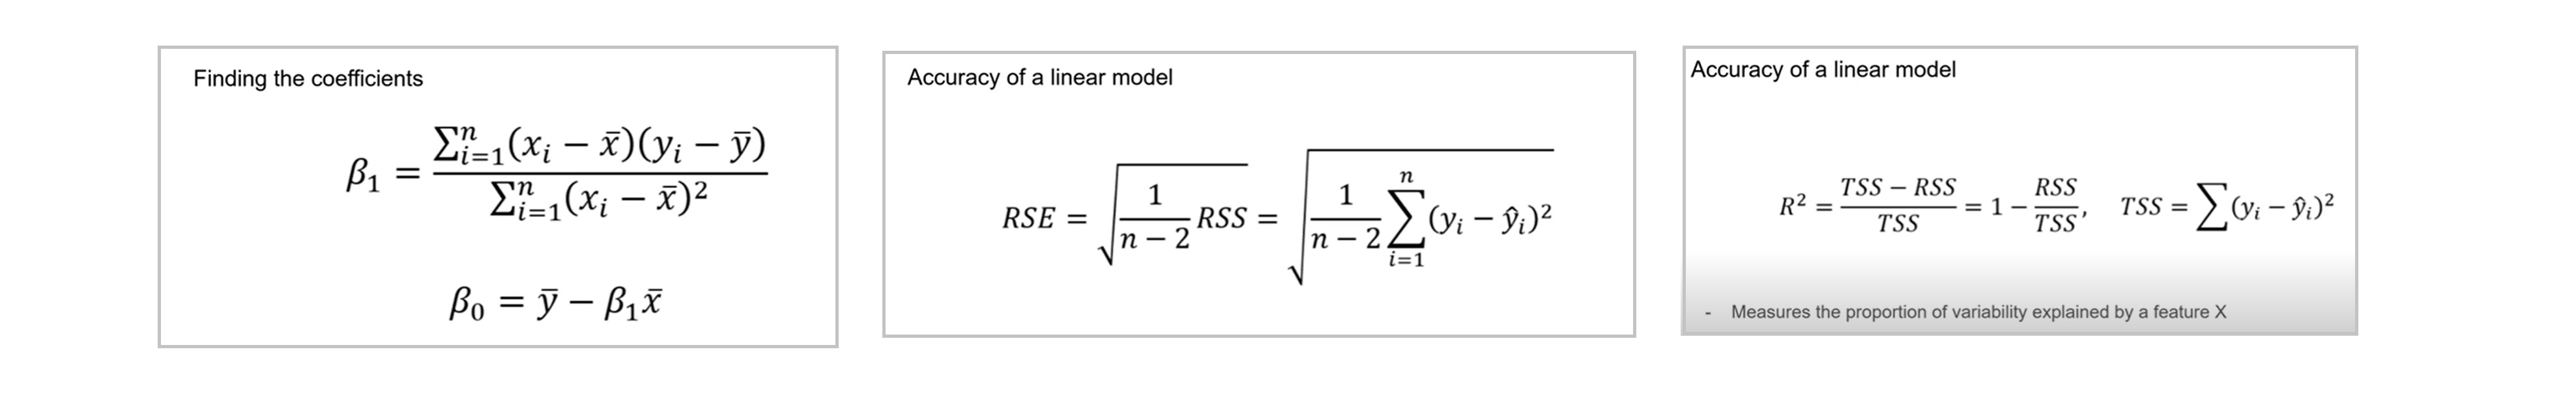

In [10]:
## stats-model
X = np.column_stack((df_sales["TV"],df_sales["radio"],df_sales["newspaper"]))
y = df_sales['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.58e-96
Time:                        21:39:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [11]:
# You can use your own data and Visualization .. this is for explaining purpose 